Notebook for Building a bullet chart in python.
Full article posted in http://pbpython.com/bullet-graph.html

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
%matplotlib inline

Show examples of using seaborn's palette functionality

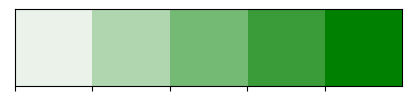

In [3]:
sns.palplot(sns.light_palette("green", 5))

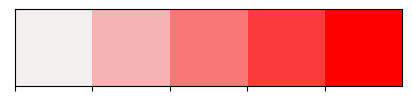

In [4]:
sns.palplot(sns.light_palette("red", 5))

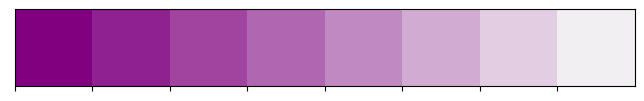

In [5]:
sns.palplot(sns.light_palette("purple",8, reverse=True))

Set up the data that we want to plot

In [6]:
limits = [80, 100, 150]
data_to_plot = ("Example 1", 105, 120)
palette = sns.color_palette("Blues_r", len(limits))

Try the first version of building a stacked bar chart

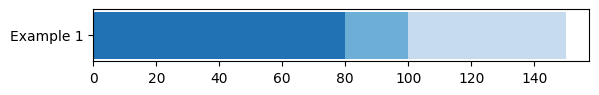

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
    prev_limit = lim

Expand on the version to add the value we are measuring

<BarContainer object of 1 artists>

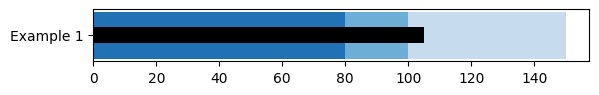

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
    prev_limit = lim
    
# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=5)

Now add on the target vertical line

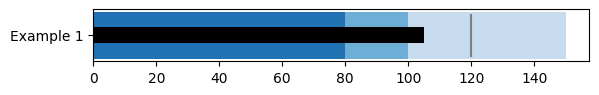

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
    prev_limit = lim
    
# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=5)
ax.axvline(data_to_plot[2], color="gray", ymin=0.10, ymax=0.9)

Build out a full function

In [10]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

C:\Users\npiku\AppData\Local\Temp\ipykernel_13716\3132978703.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0]])


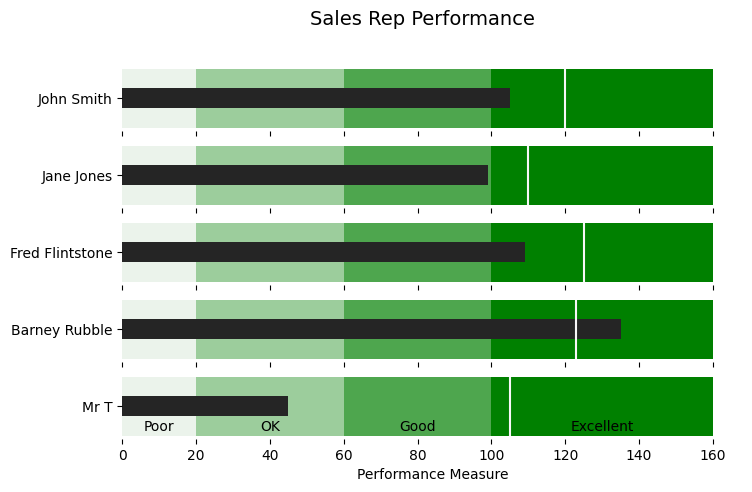

In [11]:
data_to_plot2 = [("John Smith", 105, 120),
                 ("Jane Jones", 99, 110),
                 ("Fred Flintstone", 109, 125),
                 ("Barney Rubble", 135, 123),
                 ("Mr T", 45, 105)]

bulletgraph(data_to_plot2, limits=[20, 60, 100, 160], labels=["Poor", "OK", "Good", "Excellent"], size=(8,5), 
            axis_label="Performance Measure", label_color="black", bar_color="#252525", target_color='#f7f7f7',
            title="Sales Rep Performance")

In [12]:
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)

C:\Users\npiku\AppData\Local\Temp\ipykernel_13716\3132978703.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0]])


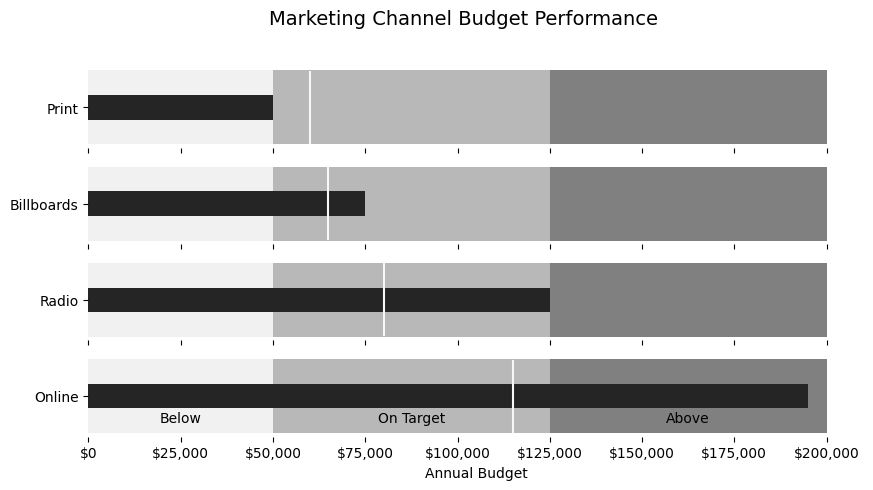

In [13]:
money_fmt = FuncFormatter(money)
data_to_plot3 = [("Print", 50000, 60000),
                 ("Billboards", 75000, 65000),
                 ("Radio", 125000, 80000),
                 ("Online", 195000, 115000)]
palette = sns.light_palette("grey", 3, reverse=False)
bulletgraph(data_to_plot3, limits=[50000, 125000, 200000], labels=["Below", "On Target", "Above"], size=(10,5), 
            axis_label="Annual Budget", label_color="black", bar_color="#252525", target_color='#f7f7f7', palette=palette,
            title="Marketing Channel Budget Performance", formatter=money_fmt)